## 腾讯算法大赛-数据探索

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dpath = "./data/"

train

In [4]:
train = pd.read_csv(dpath+"train.csv")

In [5]:
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [7]:
train.shape

(3749528, 8)

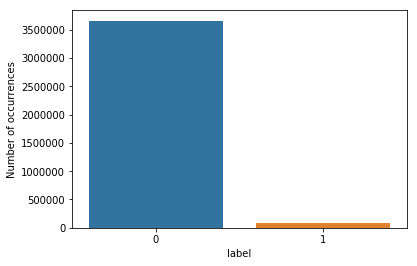

In [10]:
sns.countplot(train.label);
plt.xlabel('label');
plt.ylabel('Number of occurrences');

In [11]:
train["label"].value_counts()

0    3656266
1      93262
Name: label, dtype: int64

In [22]:
train.apply(lambda x:sum(x.isnull()))

label                     0
clickTime                 0
conversionTime      3656266
creativeID                0
userID                    0
positionID                0
connectionType            0
telecomsOperator          0
dtype: int64

test

In [19]:
test = pd.read_csv(dpath+"test.csv")

In [20]:
test.head()

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,1,-1,310000,3745,1164848,3451,1,3
1,2,-1,310000,2284,2127247,1613,1,3
2,3,-1,310000,1456,2769125,5510,2,1
3,4,-1,310000,4565,9762,4113,2,3
4,5,-1,310000,49,2513636,3615,1,3


In [21]:
test.shape

(338489, 8)

user

In [12]:
user = pd.read_csv(dpath+"user.csv")

In [13]:
user.head()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,1,42,1,0,2,0,512,503
1,2,18,1,5,1,0,1403,1403
2,3,0,2,4,0,0,0,0
3,4,21,2,5,3,0,607,607
4,5,22,2,0,0,0,0,1301


In [14]:
user.shape

(2805118, 8)

In [15]:
user.apply(lambda x:sum(x.isnull()))

userID            0
age               0
gender            0
education         0
marriageStatus    0
haveBaby          0
hometown          0
residence         0
dtype: int64

In [27]:
len(user["userID"].unique())

2805118

ad

In [23]:
ad = pd.read_csv(dpath+"ad.csv")

In [24]:
ad.head()

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1


In [25]:
ad.shape

(6582, 6)

In [26]:
ad.apply(lambda x:sum(x.isnull()))

creativeID      0
adID            0
camgaignID      0
advertiserID    0
appID           0
appPlatform     0
dtype: int64

app_categories

In [28]:
app_categories = pd.read_csv(dpath+"app_categories.csv")

In [29]:
app_categories.head()

,appID,appCategory
0,14,2
1,25,203
2,68,104
3,75,402
4,83,203


In [30]:
app_categories.apply(lambda x:sum(x.isnull()))

appID          0
appCategory    0
dtype: int64

In [34]:
app_categories["appCategory"].value_counts()

0      67757
106    34314
401    10779
209     9875
104     9355
301     7467
203     7056
402     6880
105     6797
503     6708
403     6648
407     5678
109     4978
408     4520
108     4477
211     4196
405     4018
103     3517
110     2959
201     2776
409     1898
303     1814
210     1739
406      600
204      223
2          6
101        5
1          1
Name: appCategory, dtype: int64

position

In [5]:
position = pd.read_csv(dpath+"position.csv")

In [6]:
position.head()

,positionID,sitesetID,positionType
0,2150,1,0
1,2579,1,0
2,3322,1,0
3,5726,1,0
4,4522,2,0


In [36]:
position.shape

(7645, 3)

In [8]:
position["positionType"].value_counts()

2    3611
1    2437
3    1035
4     428
0      92
5      42
Name: positionType, dtype: int64

In [7]:
position["sitesetID"].value_counts()

0    7556
1      87
2       2
Name: sitesetID, dtype: int64

In [33]:
position.apply(lambda x:sum(x.isnull()))

positionID      0
sitesetID       0
positionType    0
dtype: int64

In [9]:
len(position["positionID"].unique())

7645

user_app_actions

In [35]:
user_app_actions = pd.read_csv(dpath+"user_app_actions.csv")

In [37]:
user_app_actions.head()

,userID,installTime,appID
0,1,182032,933
1,5,141354,589
2,5,251727,565
3,5,260932,596
4,5,261318,536


In [38]:
user_app_actions.shape

(6003471, 3)

In [39]:
user_app_actions.apply(lambda x:sum(x.isnull()))

userID         0
installTime    0
appID          0
dtype: int64

In [10]:
train_merge = pd.read_csv(dpath+"train_merge.csv")

In [11]:
train_merge.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,...,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,app_categories_first_class,app_categories_second_class,sitesetID,positionType
0,0,170000,NaN,3089,2798058,293,1,1,17,0,...,1321,83,10,434,1,108,1,8,0,3
1,0,180028,NaN,3089,1683269,293,2,3,18,0,...,1321,83,10,434,1,108,1,8,0,3
2,0,191045,NaN,3089,240899,293,1,2,19,1,...,1321,83,10,434,1,108,1,8,0,3
3,0,182300,NaN,2230,2177495,293,2,1,18,3,...,2841,83,10,434,1,108,1,8,0,3
4,0,200113,NaN,2230,417301,293,2,2,20,0,...,2841,83,10,434,1,108,1,8,0,3


In [12]:
train_merge.shape

(3749528, 32)

In [13]:
train_merge.apply(lambda x:sum(x.isnull()))

label                                0
clickTime                            0
conversionTime                 3656266
creativeID                           0
userID                               0
positionID                           0
connectionType                       0
telecomsOperator                     0
clickTime_day                        0
clickTime_hour                       0
age                                  0
gender                               0
education                            0
marriageStatus                       0
haveBaby                             0
hometown                             0
residence                            0
age_process                          0
hometown_province                    0
hometown_city                        0
residence_province                   0
residence_city                       0
adID                                 0
camgaignID                           0
advertiserID                         0
appID                    